# Applying Stacking for Regression:  Diabetes dataset


In [1]:
# Libraries and data loading
from sklearn.datasets import load_diabetes
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import KFold
from sklearn import metrics
import numpy as np
diabetes = load_diabetes()

train_x, train_y = diabetes.data[:400], diabetes.target[:400]
test_x, test_y = diabetes.data[400:], diabetes.target[400:]

In [3]:
train_x.shape


(400, 10)

In [5]:
test_x.shape

(42, 10)

In [6]:
# Create the ensemble's base learners and meta learner
# Append base learners to a list for ease of access
base_learners = []

knn = KNeighborsRegressor(n_neighbors=5)
base_learners.append(knn)

dtr = DecisionTreeRegressor(max_depth=4, random_state=123456)
base_learners.append(dtr)

ridge = Ridge()
base_learners.append(ridge)

meta_learner = LinearRegression()

In [7]:
# Create the training meta data

# Create variables to store meta data and their targets
meta_data = np.zeros((len(base_learners), len(train_x)))
meta_targets = np.zeros(len(train_x))

# Create the cross-validation folds
KF = KFold(n_splits=5)
meta_index = 0
for train_indices, test_indices in KF.split(train_x):
    # Train each learner on the K-1 folds and create meta data for the Kth fold
    for i in range(len(base_learners)):
        learner = base_learners[i]

        learner.fit(train_x[train_indices], train_y[train_indices])
        predictions = learner.predict(train_x[test_indices])

        meta_data[i][meta_index:meta_index+len(test_indices)] = predictions

    meta_targets[meta_index:meta_index+len(test_indices)] = train_y[test_indices]
    meta_index += len(test_indices)

# Transpose the meta data to be fed into the meta learner
meta_data = meta_data.transpose()

In [8]:
meta_data.shape

(400, 3)

In [9]:
# Create the meta data for the test set and evaluate the base learners
test_meta_data = np.zeros((len(base_learners), len(test_x)))
base_errors = []
base_r2 = []
for i in range(len(base_learners)):
    learner = base_learners[i]
    learner.fit(train_x, train_y)
    predictions = learner.predict(test_x)
    test_meta_data[i] = predictions

    err = metrics.mean_squared_error(test_y, predictions)
    r2 = metrics.r2_score(test_y, predictions)

    base_errors.append(err)
    base_r2.append(r2)

test_meta_data = test_meta_data.transpose()

In [10]:
test_meta_data.shape

(42, 3)

In [12]:
# Fit the meta learner on the train set and evaluate it on the test set
meta_learner.fit(meta_data, meta_targets)
ensemble_predictions = meta_learner.predict(test_meta_data)

err = metrics.mean_squared_error(test_y, ensemble_predictions)
r2 = metrics.r2_score(test_y, ensemble_predictions)


In [13]:
# Print the results
print('ERROR  R2  Name')
print('-'*20)
for i in range(len(base_learners)):
    learner = base_learners[i]

    print(f'{base_errors[i]:.1f} {base_r2[i]:.2f} {learner.__class__.__name__}')
print(f'{err:.1f} {r2:.2f} Ensemble')

ERROR  R2  Name
--------------------
2697.8 0.51 KNeighborsRegressor
3142.5 0.43 DecisionTreeRegressor
2564.8 0.54 Ridge
2066.6 0.63 Ensemble


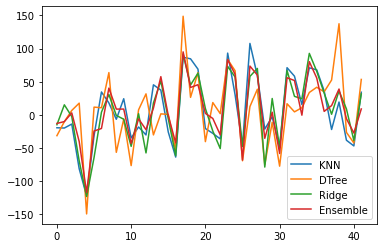

In [14]:
import matplotlib.pyplot as plt

knn_d = test_meta_data[:,0]-test_y
dtr_d = test_meta_data[:,1]-test_y
ridge_d = test_meta_data[:,2]-test_y
meta_d =  ensemble_predictions-test_y

plt.plot(knn_d, label='KNN')
plt.plot(dtr_d, label='DTree')
plt.plot(ridge_d, label='Ridge')
plt.plot(meta_d, label='Ensemble')
plt.legend()

# Applying Stacking for Classification:  Breast Cancer dataset

In [15]:
# Libraries and data loading
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn import metrics
import numpy as np
bc = load_breast_cancer()


train_x, train_y = bc.data[:400], bc.target[:400]
test_x, test_y = bc.data[400:], bc.target[400:]

In [16]:
train_x.shape

(400, 30)

In [17]:
test_x.shape

(169, 30)

In [18]:
# Create the ensemble's base learners and meta learner
# Append base learners to a list for ease of access
base_learners = []

knn = KNeighborsClassifier(n_neighbors=2)
base_learners.append(knn)

dtr = DecisionTreeClassifier(max_depth=4, random_state=123456)
base_learners.append(dtr)

mlpc = MLPClassifier(hidden_layer_sizes =(100, ), solver='lbfgs', random_state=123456)
base_learners.append(mlpc)


meta_learner = LogisticRegression(solver='lbfgs')

In [19]:
# Create the training meta data

# Create variables to store meta data and their targets
meta_data = np.zeros((len(base_learners), len(train_x)))
meta_targets = np.zeros(len(train_x))

# Create the cross-validation folds
KF = KFold(n_splits=5)
meta_index = 0
for train_indices, test_indices in KF.split(train_x):
    # Train each learner on the K-1 folds and create meta data for the Kth fold
    for i in range(len(base_learners)):
        learner = base_learners[i]

        learner.fit(train_x[train_indices], train_y[train_indices])
        predictions = learner.predict_proba(train_x[test_indices])[:,0]

        meta_data[i][meta_index:meta_index+len(test_indices)] = predictions

    meta_targets[meta_index:meta_index+len(test_indices)] = train_y[test_indices]
    meta_index += len(test_indices)

# Transpose the meta data to be fed into the meta learner
meta_data = meta_data.transpose()

C:\Users\15025\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\15025\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\15025\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

In [20]:
meta_data.shape

(400, 3)

In [21]:
# Create the meta data for the test set and evaluate the base learners
test_meta_data = np.zeros((len(base_learners), len(test_x)))
base_acc = []
for i in range(len(base_learners)):
    learner = base_learners[i]
    learner.fit(train_x, train_y)
    predictions = learner.predict_proba(test_x)[:,0]
    test_meta_data[i] = predictions

    acc = metrics.accuracy_score(test_y, learner.predict(test_x))


    base_acc.append(acc)

test_meta_data = test_meta_data.transpose()

C:\Users\15025\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [22]:
# Fit the meta learner on the train set and evaluate it on the test set
meta_learner.fit(meta_data, meta_targets)
ensemble_predictions = meta_learner.predict(test_meta_data)

acc = metrics.accuracy_score(test_y, ensemble_predictions)

In [23]:
# Print the results
print('Acc  Name')
print('-'*20)
for i in range(len(base_learners)):
    learner = base_learners[i]

    print(f'{base_acc[i]:.2f} {learner.__class__.__name__}')
print(f'{acc:.2f} Ensemble')

Acc  Name
--------------------
0.86 KNeighborsClassifier
0.88 DecisionTreeClassifier
0.92 MLPClassifier
0.94 Ensemble


In [24]:
base_errors = (test_meta_data.transpose() - test_y).transpose()
prediction_errors = ensemble_predictions - test_y

for i in range(len(prediction_errors)):
    if not prediction_errors[i] == 0.0:
        print(base_errors[i,:])

[-1.          0.         -0.27855635]
[-0.5         0.         -0.41468405]
[ 0.00000000e+00 -1.00000000e+00 -5.54156966e-04]
[ 0.        0.       -0.031367]
[ 0.         -0.97685185 -0.2437451 ]
[0.         0.02314815 0.28720736]
[-0.5         0.         -0.02858243]
[-1.          0.         -0.21626077]
[ 0.         -0.97685185 -0.10865132]
[-0.5         0.         -0.79926213]
